## Heart Attack Prediction
The dataset used to train the model were obtained from Kaggle. You can check it out [here](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). I have also build a web app with it, feel free to check it out [here](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) too. This problem involves binary classification, distinguishing between cases with a heart disease and those without. Scikit learn provides a diverse set of classification algorithms, we can start by exploring few of the classofication algorithms such as Logistic Regression, Random Forest, K Nearest Neighbors and XGBoost. After that, we will train our model using Neural Network approach which involves Tensorflow library.

### Table Of Contents
- [ 1. Exploratory Data Analysis ](#1)
  - [ 1.1 Data Dictionary ](#1.1)
  - [ 1.2 Data Cleaning ](#1.2)
  - [ 1.3 Data Visualization ](#1.3)
  - [ 1.4 Data Preprocessing ](#1.4)
 - [ 2. Model Predictions ](#2)
    - [ 2.1 Logistic Regression ](#2.1)
    - [ 2.2 Decision Tree Classifier ](#2.2)
    - [ 2.3 Random Forest Classifier ](#2.3)
    - [ 2.4 XG Boost ](#2.4)
    - [ 2.5 KNN Classifier ](#2.5)
    - [ 2.6 Neural Network Approach ](#2.6)

<a name="1"></a>
### 1 - Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# load data
df = pd.read_csv('./data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

<a name="1.1"></a>
### 1.1 - Data Dictionary

| Variable | Definition | Key |
| :-: | :-: | :-: |
| Age | Age Of the patient | |
| Sex | Sex of the patient | 1 = male; 2 = female; |
| exang | exercise induced anigna | 1 = yes; 0 = no |
| caa | number of major vessels | 0-3 |
| cp | Chess Pain type | 1 = typical anigma; 2 = atypical anigma; 3 = non-anginal pain; 4 = asymptomatic |
| trtbps | resting blood pressure (in mm Hg) |  |
| chol | cholestoral in mg/dl fetched via BMI sensor |  |
| fbs | fasting blood sugar > 120 mg/dl | 1 = true; 0 = false |
| rest_ecg | resting electrocardiographic results | 0 = normal; 1 = having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertropy |
| thalachh | maximum heart rate achieved | |
| exng | exercise induced angina | 1 = yes; 0 = no |
| oldpeak | previous peak | |
| slp | slope | 0 = upsloping; 1 = flat; 2 = downsloping |
| thall | Thal rate | 0 = normal; 1 = fixed defect; 2 = reversible defect |
| target | chance of getting a heart attack | 0 = low chance; 1 = high chance |

<a name="1.2"></a>
### 1.2 - Data Cleaning

#### Check for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### No null values found

#### Checking for duplicate rows

In [6]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### Removing duplicate values

In [7]:
df.drop_duplicates(keep='first', inplace=True)

#### Check new shape

In [8]:
df.shape

(302, 14)

#### Statistical data

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Save processed data to a csv file for website use

In [10]:
processed_data_filename = './data/processed-data.csv'
# Save processed data to a CSV file
df.to_csv(processed_data_filename, index=False)
print('Data saved!')

Data saved!


<a name="1.3"></a>
### 1.3 - Data Visualization

#### Percentage of People Getting a Heart Disease

In [11]:
infected = df["output"].value_counts()[1]
not_infected = df["output"].value_counts()[0]
print(f"{infected} were infected with heart disease.\n{not_infected} were not infected with heart disease.")

164 were infected with heart disease.
138 were not infected with heart disease.


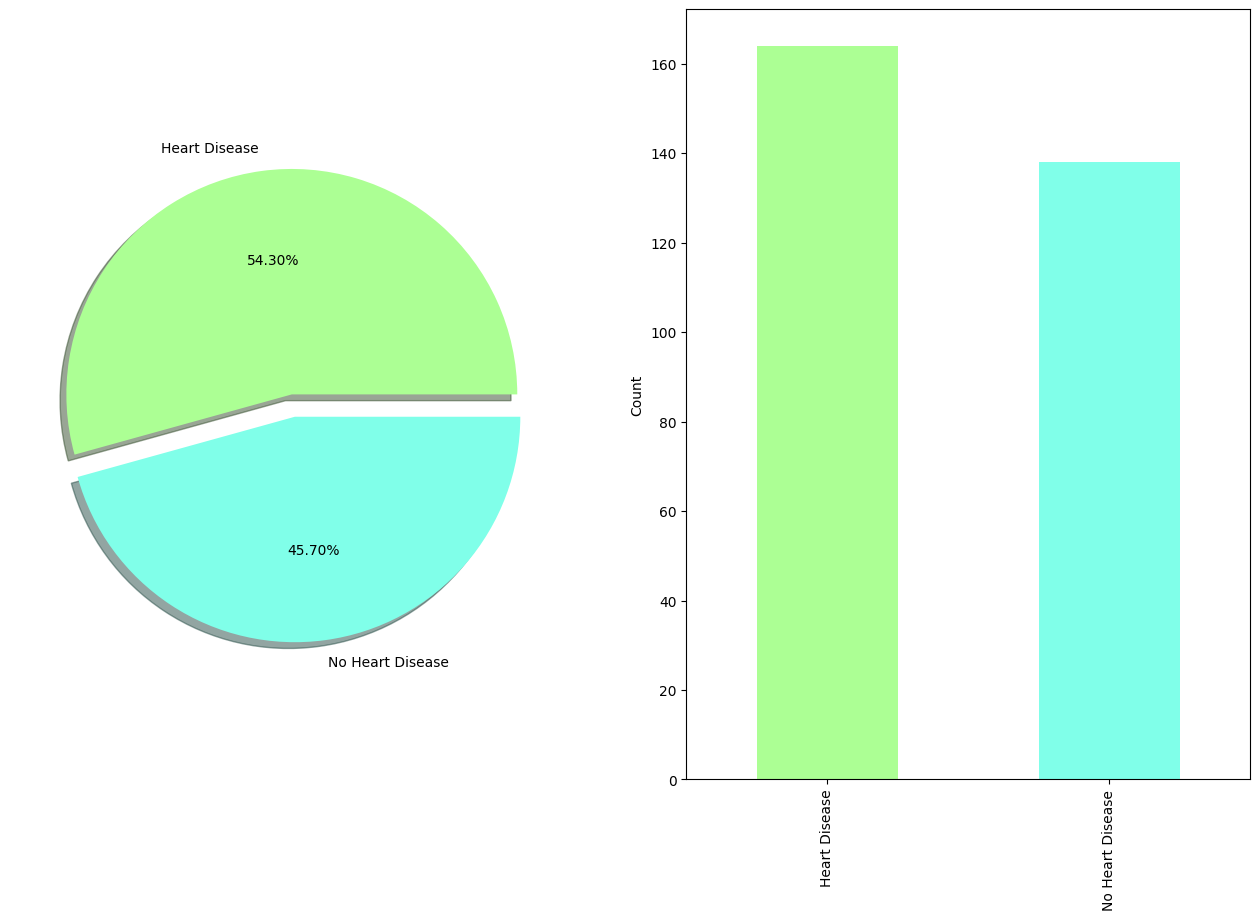

In [13]:
f, ax = plt.subplots(1, 2, figsize=(16,10))
df["output"].replace({0:"No Heart Disease", 1:"Heart Disease"}).value_counts().plot(kind='pie', colors=["#ACFF94", "#80FFE9"], ax=ax[0], explode=[0,0.1], autopct='%1.2f%%', shadow=True)
df["output"].replace({0:"No Heart Disease", 1:"Heart Disease"}).value_counts().plot(kind='bar', color=["#ACFF94", "#80FFE9"], ax=ax[1])
ax[0].set_ylabel('')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('')
plt.show()

#### Gender Visualization

In [14]:
gender_output_counts = df.groupby(['sex', 'output']).size().unstack(fill_value=0)
total_men = gender_output_counts.loc[0].sum()
total_women = gender_output_counts.loc[1].sum()

# Calculate percentages
men_none_percentage = (gender_output_counts.loc[0, 0] / total_men) * 100
men_yes_percentage = (gender_output_counts.loc[0, 1] / total_men) * 100
women_none_percentage = (gender_output_counts.loc[1, 0] / total_women) * 100
women_yes_percentage = (gender_output_counts.loc[1, 1] / total_women) * 100

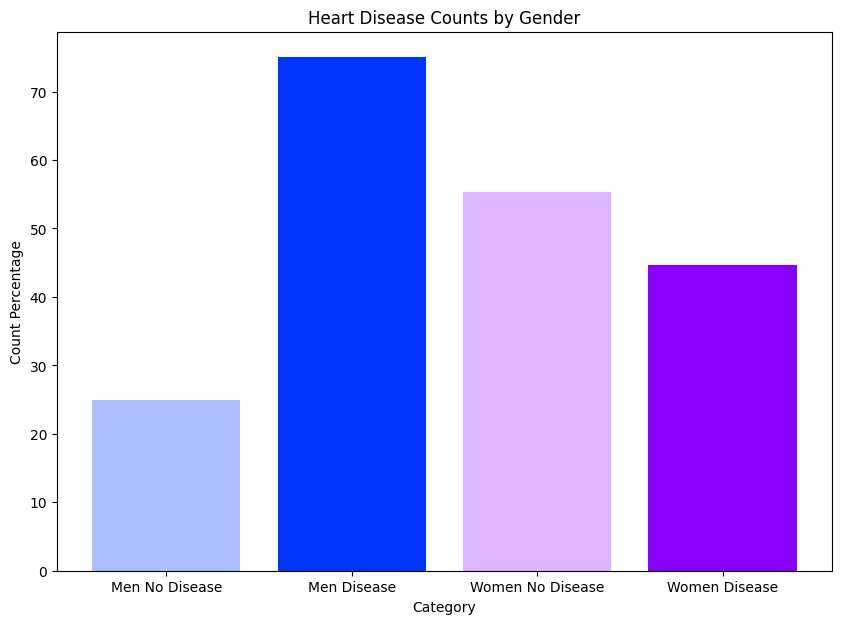

In [15]:
fig = plt.figure(figsize =(10, 7))
categories = ['Men No Disease', 'Men Disease', 'Women No Disease', 'Women Disease']
percentages = [men_none_percentage, men_yes_percentage, women_none_percentage, women_yes_percentage]

plt.bar(categories, percentages, color=['#ADBEFF', '#0035FF', '#DCB4FF', '#8700FC'])
plt.xlabel('Category')
plt.ylabel('Count Percentage')
plt.title('Heart Disease Counts by Gender')
plt.show()

#### Density Distribution for Age

<Figure size 1000x1000 with 0 Axes>

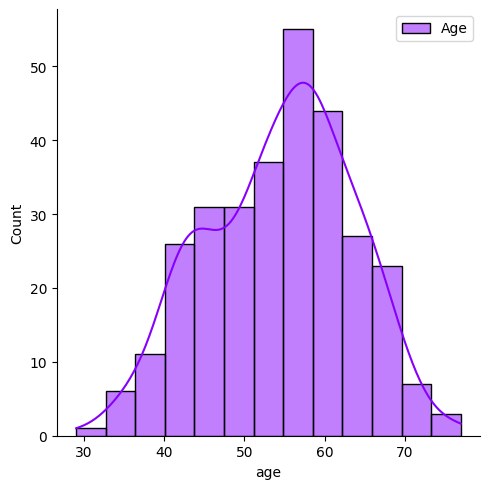

In [16]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="#8700FC", label="Age", kde=True)
plt.legend()

##### Heart Attack Vs Age

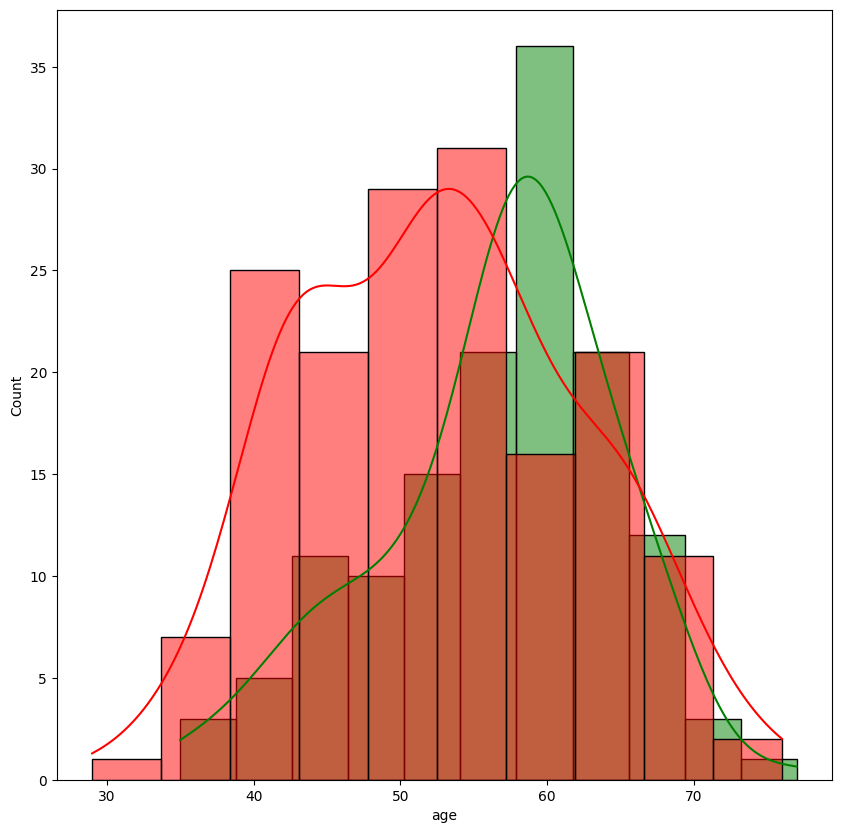

In [17]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output'] == 0]['age'], color="green", kde=True)
sns.histplot(df[df['output'] == 1]['age'], color="red", kde=True)
plt.show()

##### Plotting correlation matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trtbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalachh'),
  Text(0, 8.5, 'exng'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slp'),
  Text(0, 11.5, 'caa'),
  Text(0, 12.5, 'thall'),
  Text(0, 13.5, 'output')])

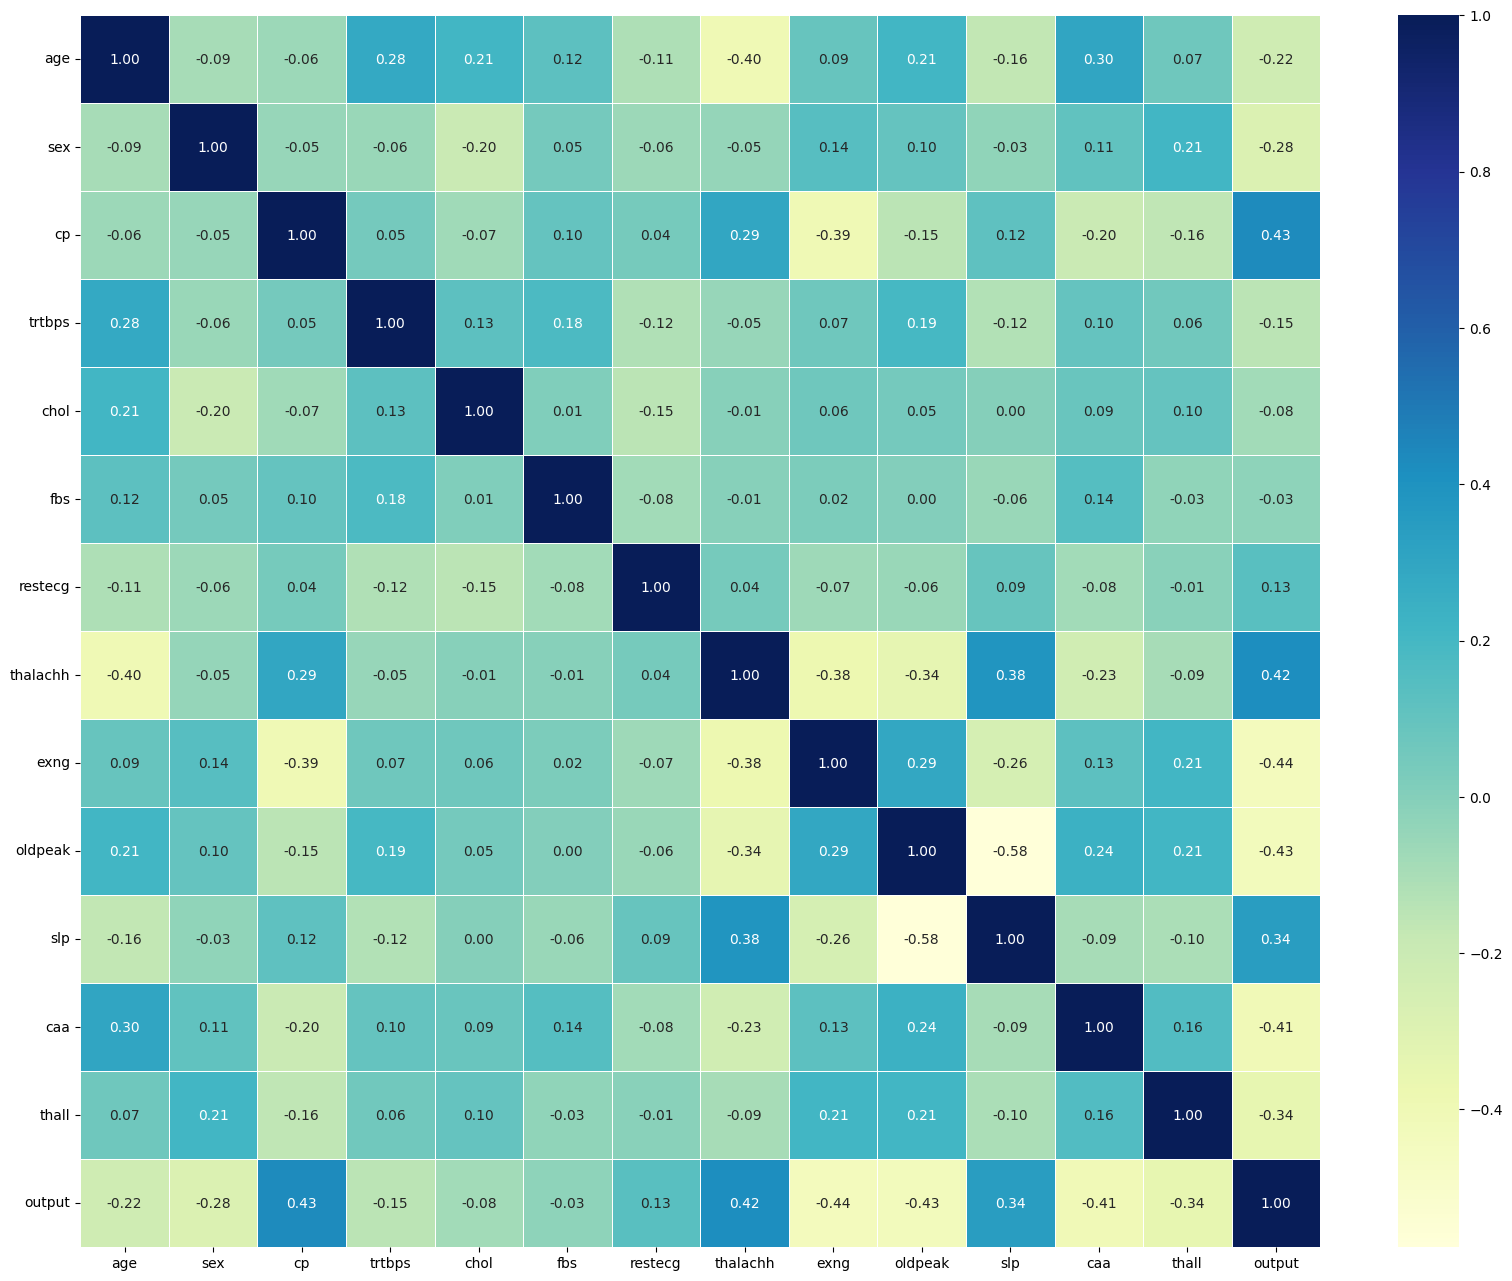

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.yticks(rotation=0)

<a name="1.4"></a>
### 1.4 - Data Preprocessing

##### define x and y values

In [11]:
x = df.drop(['output'], axis=1).values
y = df.output.values

##### Split data into train and test set

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

print("Shape for x_train: ", x_train.shape)
print("Shape for x_test: ", x_test.shape)
print("Shape for y_train: ", y_train.shape)
print("Shape for y_test: ", y_test.shape)

Shape for x_train:  (241, 13)
Shape for x_test:  (61, 13)
Shape for y_train:  (241,)
Shape for y_test:  (61,)


#### Feature Scaling

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train

array([[-1.30504994, -1.4186261 ,  0.98544689, ..., -0.61492051,
        -0.70674006, -0.49876142],
       [ 1.25925059, -1.4186261 ,  0.98544689, ..., -0.61492051,
         0.29516791, -0.49876142],
       [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
        -0.70674006, -0.49876142],
       ...,
       [ 0.14433732,  0.70490738,  1.94307874, ..., -0.61492051,
        -0.70674006,  1.1478345 ],
       [-0.85908463,  0.70490738,  0.98544689, ...,  0.99590387,
        -0.70674006, -0.49876142],
       [ 0.36731998,  0.70490738,  0.98544689, ...,  0.99590387,
         1.29707587,  1.1478345 ]])

<a name="2"></a>
## 2 - Model Predictions

<a name="2.1"></a>
### 2.1 Logistic Regression
We will first start with building logistic regression from scratch and later on we can compare it with Scikit Learn library

In [23]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [24]:
def compute_cost(x, y, w, b, *argv):
    m, n = x.shape
    total_cost=0.0
    for i in range(m):
        z_i = np.dot(x[i],w)+b
        f_wb_i = sigmoid(z_i)
        total_cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    total_cost = total_cost /m    
    return total_cost

In [26]:
def compute_gradient(x, y, w, b, *argv):
    m, n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_db, dj_dw

##### Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha

In [27]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(x)
    J_history = []
    w_history = []
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        if i<100000:
            cost =  cost_function(x, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w_in, b_in, J_history, w_history

In [30]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(13) - 0.5)
initial_b = -8
print("Initial weights:", initial_w)
print("Initial bias:", initial_b)
iterations = 30000
alpha = 0.001
w,b, J_history,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Initial weights: [-0.00082978  0.00220324 -0.00499886 -0.00197667 -0.00353244 -0.00407661
 -0.0031374  -0.00154439 -0.00103233  0.00038817 -0.00080805  0.0018522
 -0.00295548]
Initial bias: -8
Iteration    0: Cost     4.32   
Iteration 3000: Cost     2.52   
Iteration 6000: Cost     1.37   
Iteration 9000: Cost     0.96   
Iteration 12000: Cost     0.76   
Iteration 15000: Cost     0.64   
Iteration 18000: Cost     0.56   
Iteration 21000: Cost     0.51   
Iteration 24000: Cost     0.48   
Iteration 27000: Cost     0.45   
Iteration 29999: Cost     0.43   


In [31]:
def predict(x, w, b):
    m, n = x.shape
    p = np.zeros(m)
    for i in range(m):
        fx = sigmoid(np.dot(x[i], w) + b)
        if fx >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

In [32]:
prediction = predict(x_test, w, b)
print ("The accuracy of Logistic Regression from Scratch is : ", accuracy_score(y_test, prediction)*100, "%")

The accuracy of Logistic Regression from Scratch is :  86.88524590163934 %


Similarly, we can utilise Scikit Learn Library to implement logistic regression, they have the similar accuracy

In [16]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
predicted=logistic_model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
logistic_accuracy = accuracy_score(y_test, predicted)*100
print ("The accuracy of Logistic Regression is : ", logistic_accuracy, "%")
print(conf)

The accuracy of Logistic Regression is :  86.88524590163934 %
[[22  5]
 [ 3 31]]


<a name="2.2"></a>
### 2.2 Decision Tree Classifier

The max_leaf_nodes argument provides a sensible way to control overfitting vs underfitting. We can compare the accuracy score from different values for max_leaf_nodes.

In [15]:
for leaf_nodes in [5, 10, 25, 50, 100]:
    decision_tree_model = DecisionTreeClassifier(min_samples_split=2, max_leaf_nodes=leaf_nodes, random_state=0)
    decision_tree_model.fit(x_train, y_train)
    predictions = decision_tree_model.predict(x_test)
    print(f"The accuracy of decision tree with max leaf node {leaf_nodes} is: ", accuracy_score(y_test, predictions.round())*100, "%")

The accuracy of decision tree with max leaf node 5 is:  83.60655737704919 %
The accuracy of decision tree with max leaf node 10 is:  83.60655737704919 %
The accuracy of decision tree with max leaf node 25 is:  78.68852459016394 %
The accuracy of decision tree with max leaf node 50 is:  77.04918032786885 %
The accuracy of decision tree with max leaf node 100 is:  77.04918032786885 %


Of the options listed,  5 and 10 are the optimal number of leaves

In [16]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=2, max_leaf_nodes=10, random_state=0)
decision_tree_model.fit(x_train, y_train)
tree_predictions = decision_tree_model.predict(x_test)
decision_tree_accuracy = accuracy_score(y_test, tree_predictions.round())*100
print(f"The accuracy of decision tree is: ", decision_tree_accuracy, "%")

The accuracy of decision tree is:  83.60655737704919 %


<a name="2.3"></a>
### 2.3 Random Forest Classifier

Similar as above, we can tune the parameters of RandomForestClassifier to get the highest accuracy. The n_estimators argument provides a sensible way to control overfitting vs underfitting.

In [19]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(x_train, y_train)
randomf_predictions = random_forest_model.predict(x_test)
randomf_accuracy = accuracy_score(y_test, randomf_predictions.round())*100
print("The accuracy of Random Forest is : ", randomf_accuracy, "%")

The accuracy of Random Forest is :  85.24590163934425 %


<a name="2.4"></a>
### 2.4 XG Boost Classifier

In [20]:
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.1, early_stopping_rounds=10, subsample=0.8, colsample_bytree=1.0)
xgb_model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)
xgb_predictions = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions.round())*100
print("The accuracy of XG Boost is : ", xgb_accuracy, "%")

The accuracy of XG Boost is :  86.88524590163934 %


<a name="2.5"></a>
### 2.5 K Nearest Neighbor Classifier

In [172]:
k_nearest_model = KNeighborsClassifier(n_neighbors = 3, p=2)
k_nearest_model.fit(x_train, y_train)
k_predictions = k_nearest_model.predict(x_test)
k_accuracy = accuracy_score(y_test, k_predictions.round())*100
print("The accuracy of KNN is: ", k_accuracy, "%")

The accuracy of KNN is:  91.80327868852459 %


<a name="2.6"></a>
### 2.6 Neural Network approach

Now, we will utilise deep learning to train the model

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
nn_model = Sequential([
    Dense(256, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

In [12]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint('model/neural_network_model.h5', monitor='accuracy', save_best_only=True, mode='max', verbose=1)
nn_model.fit(x_train, y_train, epochs=1500, batch_size=32, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/1500
1/8 [==>...........................] - ETA: 8s - loss: 0.4581 - accuracy: 0.8438
Epoch 1: accuracy improved from -inf to 0.83817, saving model to model\neural_network_model.h5
8/8 [==============================] - 1s 44ms/step - loss: 0.3590 - accuracy: 0.8382 - val_loss: 0.4129 - val_accuracy: 0.8361
Epoch 2/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.8438
Epoch 2: accuracy improved from 0.83817 to 0.85477, saving model to model\neural_network_model.h5
8/8 [==============================] - 0s 16ms/step - loss: 0.3235 - accuracy: 0.8548 - val_loss: 0.4134 - val_accuracy: 0.8525
Epoch 3/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4293 - accuracy: 0.7812
Epoch 3: accuracy did not improve from 0.85477
8/8 [==============================] - 0s 9ms/step - loss: 0.3450 - accuracy: 0.8257 - val_loss: 0.4247 - val_accuracy: 0.8197
Epoch 4/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9062
E

1/8 [==>...........................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8750
Epoch 60: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 10ms/step - loss: 0.3388 - accuracy: 0.8465 - val_loss: 0.4159 - val_accuracy: 0.8197
Epoch 61/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.7500
Epoch 61: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 11ms/step - loss: 0.3685 - accuracy: 0.8299 - val_loss: 0.3981 - val_accuracy: 0.8361
Epoch 62/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8438
Epoch 62: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 9ms/step - loss: 0.3215 - accuracy: 0.8755 - val_loss: 0.3974 - val_accuracy: 0.8361
Epoch 63/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.8125
Epoch 63: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 10ms/step - loss:

1/8 [==>...........................] - ETA: 0s - loss: 0.1688 - accuracy: 0.9375
Epoch 120: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 9ms/step - loss: 0.3315 - accuracy: 0.8548 - val_loss: 0.3912 - val_accuracy: 0.8197
Epoch 121/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2451 - accuracy: 0.9062
Epoch 121: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 9ms/step - loss: 0.3225 - accuracy: 0.8589 - val_loss: 0.4256 - val_accuracy: 0.8197
Epoch 122/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2031 - accuracy: 0.9375
Epoch 122: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 9ms/step - loss: 0.3332 - accuracy: 0.8506 - val_loss: 0.4250 - val_accuracy: 0.8033
Epoch 123/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2539 - accuracy: 0.9062
Epoch 123: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 8ms/step - l

1/8 [==>...........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.8125
Epoch 180: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 9ms/step - loss: 0.3121 - accuracy: 0.8465 - val_loss: 0.4449 - val_accuracy: 0.8197
Epoch 181/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4542 - accuracy: 0.8125
Epoch 181: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 10ms/step - loss: 0.3373 - accuracy: 0.8506 - val_loss: 0.4434 - val_accuracy: 0.8197
Epoch 182/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.7812
Epoch 182: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 9ms/step - loss: 0.3155 - accuracy: 0.8714 - val_loss: 0.4259 - val_accuracy: 0.8361
Epoch 183/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3652 - accuracy: 0.8438
Epoch 183: accuracy did not improve from 0.89627
8/8 [==============================] - 0s 9ms/step - 

Epoch 240/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2877 - accuracy: 0.8438
Epoch 240: accuracy did not improve from 0.90041
8/8 [==============================] - 0s 10ms/step - loss: 0.3197 - accuracy: 0.8838 - val_loss: 0.4390 - val_accuracy: 0.7869
Epoch 241/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.8438
Epoch 241: accuracy did not improve from 0.90041
8/8 [==============================] - 0s 9ms/step - loss: 0.3173 - accuracy: 0.8672 - val_loss: 0.4515 - val_accuracy: 0.8197
Epoch 242/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4188 - accuracy: 0.7812
Epoch 242: accuracy did not improve from 0.90041
8/8 [==============================] - 0s 10ms/step - loss: 0.3289 - accuracy: 0.8589 - val_loss: 0.4430 - val_accuracy: 0.8197
Epoch 243/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.9375
Epoch 243: accuracy did not improve from 0.90041
8/8 [==============================] 

1/8 [==>...........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.9062
Epoch 300: accuracy did not improve from 0.90041
8/8 [==============================] - 0s 11ms/step - loss: 0.3331 - accuracy: 0.8631 - val_loss: 0.3936 - val_accuracy: 0.8197
Epoch 301/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.5536 - accuracy: 0.7500
Epoch 301: accuracy did not improve from 0.90041
8/8 [==============================] - 0s 12ms/step - loss: 0.3731 - accuracy: 0.8174 - val_loss: 0.4044 - val_accuracy: 0.8033
Epoch 302/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2548 - accuracy: 0.8750
Epoch 302: accuracy did not improve from 0.90041
8/8 [==============================] - 0s 11ms/step - loss: 0.3253 - accuracy: 0.8548 - val_loss: 0.4112 - val_accuracy: 0.8361
Epoch 303/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3083 - accuracy: 0.8438
Epoch 303: accuracy did not improve from 0.90041
8/8 [==============================] - 0s 9ms/step 

Epoch 330/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3977 - accuracy: 0.8125
Epoch 330: accuracy did not improve from 0.90456
8/8 [==============================] - 0s 10ms/step - loss: 0.3205 - accuracy: 0.8714 - val_loss: 0.4311 - val_accuracy: 0.8033
Epoch 331/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2762 - accuracy: 0.8750
Epoch 331: accuracy did not improve from 0.90456
8/8 [==============================] - 0s 9ms/step - loss: 0.3344 - accuracy: 0.8631 - val_loss: 0.4535 - val_accuracy: 0.7705
Epoch 332/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4290 - accuracy: 0.7812
Epoch 332: accuracy did not improve from 0.90456
8/8 [==============================] - 0s 12ms/step - loss: 0.3531 - accuracy: 0.8548 - val_loss: 0.4217 - val_accuracy: 0.8033
Epoch 333/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.8438
Epoch 333: accuracy did not improve from 0.90456
8/8 [==============================] 

1/8 [==>...........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8125
Epoch 390: accuracy did not improve from 0.90456
8/8 [==============================] - 0s 12ms/step - loss: 0.3660 - accuracy: 0.8174 - val_loss: 0.4765 - val_accuracy: 0.8033
Epoch 391/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3617 - accuracy: 0.8438
Epoch 391: accuracy did not improve from 0.90456
8/8 [==============================] - 0s 11ms/step - loss: 0.3413 - accuracy: 0.8506 - val_loss: 0.5241 - val_accuracy: 0.8033
Epoch 392/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3466 - accuracy: 0.8750
Epoch 392: accuracy did not improve from 0.90456
8/8 [==============================] - 0s 10ms/step - loss: 0.3368 - accuracy: 0.8714 - val_loss: 0.4875 - val_accuracy: 0.8033
Epoch 393/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8125
Epoch 393: accuracy did not improve from 0.90456
8/8 [==============================] - 0s 10ms/step

Epoch 420/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.8125
Epoch 420: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step - loss: 0.3658 - accuracy: 0.8423 - val_loss: 0.4528 - val_accuracy: 0.8197
Epoch 421/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1945 - accuracy: 0.9688
Epoch 421: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3085 - accuracy: 0.8672 - val_loss: 0.4234 - val_accuracy: 0.8197
Epoch 422/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8438
Epoch 422: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step - loss: 0.3989 - accuracy: 0.8174 - val_loss: 0.4276 - val_accuracy: 0.8197
Epoch 423/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3462 - accuracy: 0.8438
Epoch 423: accuracy did not improve from 0.91286
8/8 [==============================] 

1/8 [==>...........................] - ETA: 0s - loss: 0.2535 - accuracy: 0.9062
Epoch 480: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step - loss: 0.2904 - accuracy: 0.8589 - val_loss: 0.4499 - val_accuracy: 0.8033
Epoch 481/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2046 - accuracy: 0.9375
Epoch 481: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3542 - accuracy: 0.8423 - val_loss: 0.4582 - val_accuracy: 0.8033
Epoch 482/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4255 - accuracy: 0.8125
Epoch 482: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step - loss: 0.3176 - accuracy: 0.8714 - val_loss: 0.4088 - val_accuracy: 0.8525
Epoch 483/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8750
Epoch 483: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 8ms/step -

1/8 [==>...........................] - ETA: 0s - loss: 0.2025 - accuracy: 0.9375
Epoch 540: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.2613 - accuracy: 0.8921 - val_loss: 0.4532 - val_accuracy: 0.7869
Epoch 541/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9062
Epoch 541: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step - loss: 0.3103 - accuracy: 0.8755 - val_loss: 0.4215 - val_accuracy: 0.8361
Epoch 542/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1470 - accuracy: 0.9375
Epoch 542: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 12ms/step - loss: 0.2946 - accuracy: 0.8838 - val_loss: 0.4186 - val_accuracy: 0.8525
Epoch 543/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.7812
Epoch 543: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step 

1/8 [==>...........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8750
Epoch 600: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step - loss: 0.3309 - accuracy: 0.8755 - val_loss: 0.4077 - val_accuracy: 0.8361
Epoch 601/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1841 - accuracy: 0.9688
Epoch 601: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step - loss: 0.3334 - accuracy: 0.8506 - val_loss: 0.4101 - val_accuracy: 0.8033
Epoch 602/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.9062
Epoch 602: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step - loss: 0.3770 - accuracy: 0.8216 - val_loss: 0.3690 - val_accuracy: 0.8689
Epoch 603/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9375
Epoch 603: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step 

1/8 [==>...........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.7812
Epoch 660: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3092 - accuracy: 0.8714 - val_loss: 0.4185 - val_accuracy: 0.8033
Epoch 661/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.7812
Epoch 661: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 12ms/step - loss: 0.3625 - accuracy: 0.8382 - val_loss: 0.4267 - val_accuracy: 0.8033
Epoch 662/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.6562
Epoch 662: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3738 - accuracy: 0.8340 - val_loss: 0.4289 - val_accuracy: 0.8197
Epoch 663/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.8750
Epoch 663: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - 

1/8 [==>...........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.8750
Epoch 720: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step - loss: 0.3220 - accuracy: 0.8631 - val_loss: 0.4426 - val_accuracy: 0.7869
Epoch 721/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9062
Epoch 721: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.2901 - accuracy: 0.8921 - val_loss: 0.4268 - val_accuracy: 0.7869
Epoch 722/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3292 - accuracy: 0.8750
Epoch 722: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3089 - accuracy: 0.8672 - val_loss: 0.4133 - val_accuracy: 0.8033
Epoch 723/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.9062
Epoch 723: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - 

1/8 [==>...........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.9062
Epoch 780: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step - loss: 0.3026 - accuracy: 0.8714 - val_loss: 0.4949 - val_accuracy: 0.8033
Epoch 781/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8125
Epoch 781: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step - loss: 0.3142 - accuracy: 0.8631 - val_loss: 0.5007 - val_accuracy: 0.7869
Epoch 782/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1796 - accuracy: 0.9375
Epoch 782: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 8ms/step - loss: 0.2589 - accuracy: 0.8797 - val_loss: 0.4975 - val_accuracy: 0.7705
Epoch 783/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.9375
Epoch 783: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step 

1/8 [==>...........................] - ETA: 0s - loss: 0.2749 - accuracy: 0.9062
Epoch 840: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step - loss: 0.3276 - accuracy: 0.8672 - val_loss: 0.4480 - val_accuracy: 0.8033
Epoch 841/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1683 - accuracy: 0.9688
Epoch 841: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 13ms/step - loss: 0.2936 - accuracy: 0.8714 - val_loss: 0.4799 - val_accuracy: 0.7705
Epoch 842/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.5141 - accuracy: 0.8750
Epoch 842: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3153 - accuracy: 0.8838 - val_loss: 0.4800 - val_accuracy: 0.7705
Epoch 843/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2446 - accuracy: 0.9062
Epoch 843: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step -

1/8 [==>...........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8438
Epoch 900: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3677 - accuracy: 0.8631 - val_loss: 0.4971 - val_accuracy: 0.8033
Epoch 901/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8438
Epoch 901: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 8ms/step - loss: 0.3263 - accuracy: 0.8506 - val_loss: 0.5361 - val_accuracy: 0.7869
Epoch 902/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.9062
Epoch 902: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.2822 - accuracy: 0.8963 - val_loss: 0.4890 - val_accuracy: 0.7869
Epoch 903/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8750
Epoch 903: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - l

1/8 [==>...........................] - ETA: 0s - loss: 0.2342 - accuracy: 0.9062
Epoch 960: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.3469 - accuracy: 0.8465 - val_loss: 0.5046 - val_accuracy: 0.7869
Epoch 961/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.8750
Epoch 961: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.2756 - accuracy: 0.9046 - val_loss: 0.5117 - val_accuracy: 0.7869
Epoch 962/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2178 - accuracy: 0.9062
Epoch 962: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 8ms/step - loss: 0.3161 - accuracy: 0.8714 - val_loss: 0.4870 - val_accuracy: 0.7705
Epoch 963/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2208 - accuracy: 0.9062
Epoch 963: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - l

Epoch 1020/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8438
Epoch 1020: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.2998 - accuracy: 0.8714 - val_loss: 0.4575 - val_accuracy: 0.8197
Epoch 1021/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2858 - accuracy: 0.9062
Epoch 1021: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 9ms/step - loss: 0.2925 - accuracy: 0.8838 - val_loss: 0.4456 - val_accuracy: 0.8033
Epoch 1022/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.7500
Epoch 1022: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 12ms/step - loss: 0.3281 - accuracy: 0.8589 - val_loss: 0.4747 - val_accuracy: 0.8033
Epoch 1023/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3487 - accuracy: 0.8438
Epoch 1023: accuracy did not improve from 0.91286
8/8 [=========================

Epoch 1050/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8750
Epoch 1050: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 12ms/step - loss: 0.3721 - accuracy: 0.8299 - val_loss: 0.4103 - val_accuracy: 0.8361
Epoch 1051/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4251 - accuracy: 0.8438
Epoch 1051: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 11ms/step - loss: 0.3241 - accuracy: 0.8506 - val_loss: 0.4830 - val_accuracy: 0.8033
Epoch 1052/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8438
Epoch 1052: accuracy did not improve from 0.91286
8/8 [==============================] - 0s 10ms/step - loss: 0.2903 - accuracy: 0.8755 - val_loss: 0.5082 - val_accuracy: 0.7869
Epoch 1053/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.7812
Epoch 1053: accuracy did not improve from 0.91286
8/8 [=======================

8/8 [==============================] - 0s 9ms/step - loss: 0.2621 - accuracy: 0.8921 - val_loss: 0.4417 - val_accuracy: 0.8033
Epoch 1080/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8125
Epoch 1080: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.3030 - accuracy: 0.8465 - val_loss: 0.4579 - val_accuracy: 0.8361
Epoch 1081/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8438
Epoch 1081: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 11ms/step - loss: 0.3153 - accuracy: 0.8548 - val_loss: 0.5119 - val_accuracy: 0.7869
Epoch 1082/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3049 - accuracy: 0.8438
Epoch 1082: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.3094 - accuracy: 0.8589 - val_loss: 0.4698 - val_accuracy: 0.7869
Epoch 1083/1500
1/8 [==>..........................

8/8 [==============================] - 0s 9ms/step - loss: 0.3573 - accuracy: 0.8548 - val_loss: 0.4552 - val_accuracy: 0.8033
Epoch 1110/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8125
Epoch 1110: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 11ms/step - loss: 0.3075 - accuracy: 0.8589 - val_loss: 0.4862 - val_accuracy: 0.7869
Epoch 1111/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8750
Epoch 1111: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.3237 - accuracy: 0.8755 - val_loss: 0.4815 - val_accuracy: 0.7869
Epoch 1112/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2104 - accuracy: 0.9375
Epoch 1112: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.3296 - accuracy: 0.8755 - val_loss: 0.4150 - val_accuracy: 0.8033
Epoch 1113/1500
1/8 [==>........................

8/8 [==============================] - 0s 9ms/step - loss: 0.3079 - accuracy: 0.8755 - val_loss: 0.4308 - val_accuracy: 0.8033
Epoch 1140/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.5121 - accuracy: 0.8125
Epoch 1140: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 11ms/step - loss: 0.3753 - accuracy: 0.8216 - val_loss: 0.4728 - val_accuracy: 0.7705
Epoch 1141/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1536 - accuracy: 0.9688
Epoch 1141: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.2793 - accuracy: 0.8963 - val_loss: 0.4978 - val_accuracy: 0.8197
Epoch 1142/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2616 - accuracy: 0.9375
Epoch 1142: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.2888 - accuracy: 0.8797 - val_loss: 0.4625 - val_accuracy: 0.7869
Epoch 1143/1500
1/8 [==>..........................

8/8 [==============================] - 0s 9ms/step - loss: 0.3236 - accuracy: 0.8714 - val_loss: 0.5387 - val_accuracy: 0.7869
Epoch 1170/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4965 - accuracy: 0.8125
Epoch 1170: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2773 - accuracy: 0.8838 - val_loss: 0.5761 - val_accuracy: 0.7869
Epoch 1171/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8438
Epoch 1171: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2925 - accuracy: 0.8797 - val_loss: 0.5920 - val_accuracy: 0.7705
Epoch 1172/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3201 - accuracy: 0.8438
Epoch 1172: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 11ms/step - loss: 0.3183 - accuracy: 0.8631 - val_loss: 0.6275 - val_accuracy: 0.7869
Epoch 1173/1500
1/8 [==>..........................

8/8 [==============================] - 0s 12ms/step - loss: 0.3016 - accuracy: 0.8714 - val_loss: 0.4740 - val_accuracy: 0.7705
Epoch 1200/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062
Epoch 1200: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.3408 - accuracy: 0.8506 - val_loss: 0.4835 - val_accuracy: 0.7705
Epoch 1201/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3629 - accuracy: 0.8438
Epoch 1201: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2948 - accuracy: 0.8755 - val_loss: 0.4719 - val_accuracy: 0.7869
Epoch 1202/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3153 - accuracy: 0.9062
Epoch 1202: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.2931 - accuracy: 0.8797 - val_loss: 0.4695 - val_accuracy: 0.7869
Epoch 1203/1500
1/8 [==>.........................

8/8 [==============================] - 0s 9ms/step - loss: 0.3232 - accuracy: 0.8797 - val_loss: 0.4600 - val_accuracy: 0.7869
Epoch 1230/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2512 - accuracy: 0.9062
Epoch 1230: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.2476 - accuracy: 0.8963 - val_loss: 0.4916 - val_accuracy: 0.7705
Epoch 1231/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2800 - accuracy: 0.9062
Epoch 1231: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.3012 - accuracy: 0.8714 - val_loss: 0.4610 - val_accuracy: 0.7869
Epoch 1232/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2528 - accuracy: 0.8750
Epoch 1232: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.3143 - accuracy: 0.8714 - val_loss: 0.4915 - val_accuracy: 0.7705
Epoch 1233/1500
1/8 [==>..........................

8/8 [==============================] - 0s 9ms/step - loss: 0.3139 - accuracy: 0.8797 - val_loss: 0.4624 - val_accuracy: 0.7869
Epoch 1260/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.8438
Epoch 1260: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.3116 - accuracy: 0.8963 - val_loss: 0.4546 - val_accuracy: 0.7869
Epoch 1261/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.5067 - accuracy: 0.7812
Epoch 1261: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.3067 - accuracy: 0.8714 - val_loss: 0.4504 - val_accuracy: 0.7869
Epoch 1262/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4419 - accuracy: 0.8438
Epoch 1262: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 13ms/step - loss: 0.2828 - accuracy: 0.8921 - val_loss: 0.4648 - val_accuracy: 0.7869
Epoch 1263/1500
1/8 [==>.........................

8/8 [==============================] - 0s 9ms/step - loss: 0.3086 - accuracy: 0.8672 - val_loss: 0.4918 - val_accuracy: 0.7869
Epoch 1290/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1636 - accuracy: 0.9375
Epoch 1290: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2940 - accuracy: 0.8921 - val_loss: 0.4889 - val_accuracy: 0.7869
Epoch 1291/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1632 - accuracy: 0.9375
Epoch 1291: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2875 - accuracy: 0.9004 - val_loss: 0.4455 - val_accuracy: 0.8033
Epoch 1292/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8438
Epoch 1292: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.3238 - accuracy: 0.8838 - val_loss: 0.4753 - val_accuracy: 0.7705
Epoch 1293/1500
1/8 [==>...........................

8/8 [==============================] - 0s 10ms/step - loss: 0.3186 - accuracy: 0.8672 - val_loss: 0.4716 - val_accuracy: 0.7541
Epoch 1320/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3664 - accuracy: 0.8750
Epoch 1320: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 14ms/step - loss: 0.3659 - accuracy: 0.8382 - val_loss: 0.5150 - val_accuracy: 0.7705
Epoch 1321/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9062
Epoch 1321: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 12ms/step - loss: 0.3278 - accuracy: 0.8672 - val_loss: 0.4998 - val_accuracy: 0.7869
Epoch 1322/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3586 - accuracy: 0.8438
Epoch 1322: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 12ms/step - loss: 0.3400 - accuracy: 0.8714 - val_loss: 0.5161 - val_accuracy: 0.7705
Epoch 1323/1500
1/8 [==>.......................

8/8 [==============================] - 0s 9ms/step - loss: 0.3344 - accuracy: 0.8465 - val_loss: 0.4820 - val_accuracy: 0.7869
Epoch 1350/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.9062
Epoch 1350: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.3295 - accuracy: 0.8631 - val_loss: 0.4872 - val_accuracy: 0.8033
Epoch 1351/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8438
Epoch 1351: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.3376 - accuracy: 0.8548 - val_loss: 0.4741 - val_accuracy: 0.7869
Epoch 1352/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750
Epoch 1352: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2858 - accuracy: 0.8921 - val_loss: 0.4923 - val_accuracy: 0.7869
Epoch 1353/1500
1/8 [==>..........................

8/8 [==============================] - 0s 11ms/step - loss: 0.3156 - accuracy: 0.8672 - val_loss: 0.4858 - val_accuracy: 0.7705
Epoch 1380/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8125
Epoch 1380: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 12ms/step - loss: 0.2997 - accuracy: 0.8921 - val_loss: 0.4919 - val_accuracy: 0.7869
Epoch 1381/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8750
Epoch 1381: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.2768 - accuracy: 0.8880 - val_loss: 0.5085 - val_accuracy: 0.7869
Epoch 1382/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.8125
Epoch 1382: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.3227 - accuracy: 0.8589 - val_loss: 0.5087 - val_accuracy: 0.7869
Epoch 1383/1500
1/8 [==>........................

8/8 [==============================] - 0s 10ms/step - loss: 0.2730 - accuracy: 0.8921 - val_loss: 0.4594 - val_accuracy: 0.7869
Epoch 1410/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8750
Epoch 1410: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.2919 - accuracy: 0.8589 - val_loss: 0.4634 - val_accuracy: 0.7705
Epoch 1411/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2696 - accuracy: 0.8438
Epoch 1411: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.3027 - accuracy: 0.8838 - val_loss: 0.4562 - val_accuracy: 0.7869
Epoch 1412/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4924 - accuracy: 0.8750
Epoch 1412: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.3457 - accuracy: 0.8880 - val_loss: 0.4972 - val_accuracy: 0.7705
Epoch 1413/1500
1/8 [==>........................

8/8 [==============================] - 0s 12ms/step - loss: 0.2947 - accuracy: 0.8672 - val_loss: 0.5222 - val_accuracy: 0.8033
Epoch 1440/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.3133 - accuracy: 0.8750
Epoch 1440: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 10ms/step - loss: 0.2650 - accuracy: 0.8963 - val_loss: 0.5477 - val_accuracy: 0.7869
Epoch 1441/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.1693 - accuracy: 0.9688
Epoch 1441: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 12ms/step - loss: 0.2820 - accuracy: 0.8755 - val_loss: 0.5294 - val_accuracy: 0.7705
Epoch 1442/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4293 - accuracy: 0.8438
Epoch 1442: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.3034 - accuracy: 0.8797 - val_loss: 0.5280 - val_accuracy: 0.8033
Epoch 1443/1500
1/8 [==>........................

8/8 [==============================] - 0s 9ms/step - loss: 0.2761 - accuracy: 0.8838 - val_loss: 0.5954 - val_accuracy: 0.7541
Epoch 1470/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.8750
Epoch 1470: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2979 - accuracy: 0.8963 - val_loss: 0.5478 - val_accuracy: 0.7869
Epoch 1471/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4153 - accuracy: 0.8438
Epoch 1471: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.3285 - accuracy: 0.8755 - val_loss: 0.5490 - val_accuracy: 0.7705
Epoch 1472/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.7500
Epoch 1472: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 8ms/step - loss: 0.3529 - accuracy: 0.8797 - val_loss: 0.5774 - val_accuracy: 0.7705
Epoch 1473/1500
1/8 [==>...........................

8/8 [==============================] - 0s 10ms/step - loss: 0.2997 - accuracy: 0.8797 - val_loss: 0.5322 - val_accuracy: 0.7869
Epoch 1500/1500
1/8 [==>...........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.8125
Epoch 1500: accuracy did not improve from 0.92116
8/8 [==============================] - 0s 9ms/step - loss: 0.2915 - accuracy: 0.8921 - val_loss: 0.5290 - val_accuracy: 0.7705


##### Neural Network outperforms other supervised machine learning models with an accuracy of 92.12%, therefore we will use it as our default model

In [13]:
model = tf.keras.models.load_model('model/neural_network_model.h5')
predictions = model.predict(x_test)
binary_predict = (predictions > 0.5).astype(int)
print(binary_predict)

2/2 [==============================] - 0s 4ms/step
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


#### Data Visualization for Different Models Accuracy

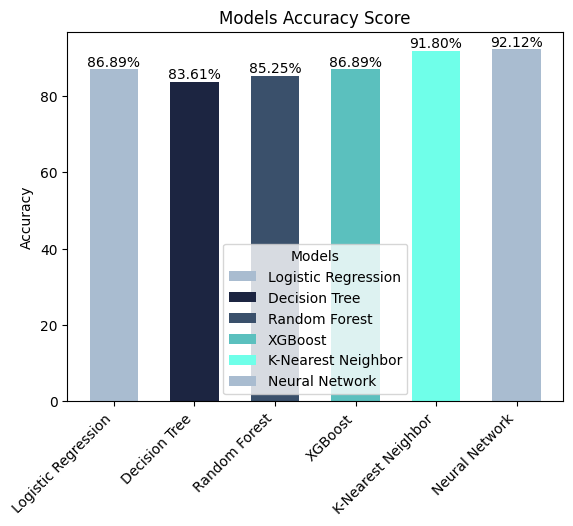

In [53]:
fig, ax = plt.subplots()

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'K-Nearest Neighbor', 'Neural Network']
accuracy = [logistic_accuracy, decision_tree_accuracy, randomf_accuracy, xgb_accuracy, k_accuracy, 92.116]
bar_colors=['#A9BCD0', '#1C2541', '#3A506B', '#5BC0BE', '#6FFFE9']

bars = ax.bar(models, accuracy, label=models, color=bar_colors, width=0.6)
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_title('Models Accuracy Score')
ax.legend(title='Models')
for bar, acc in zip(bars, accuracy):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc:.2f}%', ha='center', va='bottom')

plt.show()

##### Save the model for usage in website

In [22]:
def save_model(model, model_name):
    filename = f'./model/{model_name}_model.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f'{model_name.title()} Model saved!')
    
save_model(logistic_model, 'logistic')
save_model(decision_tree_model, 'decision_tree')
save_model(random_forest_model, 'random_forest')
save_model(xgb_model, 'xgb')
save_model(k_nearest_model, 'knn')

Logistic Model saved!
Decision_Tree Model saved!
Random_Forest Model saved!
Xgb Model saved!
Knn Model saved!
